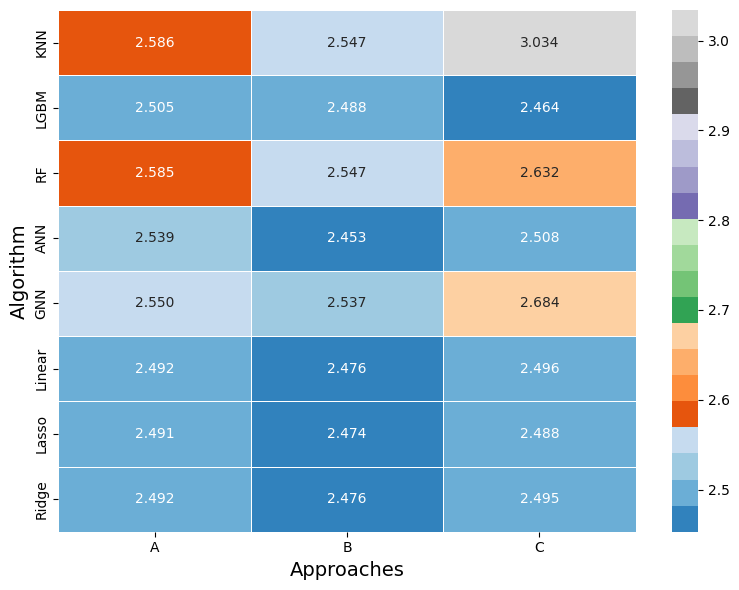

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the column and row labels
models = ['KNN', 'LGBM', 'RF', 'ANN', 'GNN', 'Linear', 'Lasso', 'Ridge']
approaches = ["CL", "FS", "NFS"]
datasets = ['Berlin', 'sparse', 'small']

# Initialize an empty list to collect MAE values
mae_values = []

# Loop over datasets and approaches to gather MAE values
for model in models:
    model_mae = []  # List to store MAE values for the current model
    for approach in approaches:
            mae = result_data['small'][approach][model]['MSE']
            model_mae.append(mae)
    mae_values.append(model_mae)  # Append MAE values for the current model


# Convert the list of lists (mae_values) into a NumPy array
data = np.array(mae_values)
columns = ['A', 'B', 'C']

# Create the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data, annot=True, fmt='.3f', cmap="tab20c", linewidths=0.5, ax=ax, xticklabels=columns, yticklabels=models)

# Set the title and axis labels
# ax.set_title("Heatmap of Algorithm Performance(Berlin, MAE)", fontsize=16)
ax.set_xlabel("Approaches", fontsize=14)
ax.set_ylabel("Algorithm", fontsize=14)

# Show the plot
plt.tight_layout()
plt.savefig("Small MSE algo.png")
plt.show()


In [27]:
models = ['KNN', 'GB', 'RF', 'ANN', 'GNN', 'Linear', 'Lasso', 'Ridge']
approaches = ["CLF-FS-REG", "FS-REG", "REG"]
datasets = ['Berlin', 'sparse', 'small']

result_data = {
     'Berlin': {
        'CLF-FS-REG': {
                'KNN': {'MAE': 10.656, 'MSE': 469.183, 'ME': 202.085},
                'GB': {'MAE': 9.480, 'MSE': 315.851, 'ME': 177.215},
                'RF': {'MAE': 9.984, 'MSE': 395.820, 'ME': 185.528},
                'ANN': {'MAE': 11.043, 'MSE': 441.860, 'ME': 283.844},
                'GNN': {'MAE': 11.725, 'MSE': 526.413},
                'Linear': {'MAE': 11.633, 'MSE': 479.971, 'ME': 203.787},
                'Lasso': {'MAE': 11.091, 'MSE': 410.852, 'ME': 210.734},
                'Ridge': {'MAE': 11.605, 'MSE': 477.230, 'ME': 204.105}
            },
        'FS-REG': {
                'KNN': {'MAE': 9.933, 'MSE': 418.104, 'ME': 200.757},
                'GB': {'MAE': 10.348, 'MSE': 457.052, 'ME': 256.707},
                'RF': {'MAE': 9.324, 'MSE': 356.962, 'ME': 206.561},
                'ANN': {'MAE': 9.415, 'MSE': 369.246, 'ME': 469.368},
                'GNN': {'MAE': 9.802, 'MSE': 402.027},
                'Linear': {'MAE': 12.030, 'MSE': 484.351, 'ME': 204.453},
                'Lasso': {'MAE': 12.037, 'MSE': 466.891, 'ME': 223.111},
                'Ridge': {'MAE': 12.002, 'MSE': 481.600, 'ME': 204.743}
            },
        'REG':{
                'KNN': {'MAE': 19.350, 'MSE': 962.856, 'ME': 259.225},
                'GB': {'MAE': 10.611, 'MSE': 342.910, 'ME': 202.073},
                'RF': {'MAE': 9.916, 'MSE': 345.508, 'ME': 209.911},
                'ANN': {'MAE': 12.091, 'MSE': 440.044, 'ME': 220.508},
                'GNN': {'MAE': 11.932, 'MSE': 429.402},
                'Linear': {'MAE': 25.184, 'MSE': 1416.969, 'ME': 223.686},
                'Lasso': {'MAE': 12.076, 'MSE': 467.952, 'ME': 221.668},
                'Ridge': {'MAE': 25.167, 'MSE': 1415.233, 'ME': 223.145}
            }
    },
    'sparse': {
        'CLF-FS-REG':{
                'KNN': {'MAE': 3.587, 'MSE': 36.946, 'ME': 36.000},
                'GB': {'MAE': 3.279, 'MSE': 27.172, 'ME': 26.025},
                'RF': {'MAE': 3.370, 'MSE': 30.516, 'ME': 25.079},
                'ANN': {'MAE': 3.245, 'MSE': 25.992, 'ME': 21.000},
                'GNN': {'MAE': 4.230, 'MSE': 33.522},
                'Linear': {'MAE': 3.400, 'MSE': 27.690, 'ME': 21.000},
                'Lasso': {'MAE': 3.398, 'MSE': 27.656, 'ME': 21.000},
                'Ridge': {'MAE': 3.400, 'MSE': 27.689, 'ME': 21.000}
        },
        'FS-REG':{
                'KNN': {'MAE': 3.316, 'MSE': 24.978, 'ME': 30.625},
                'GB': {'MAE': 3.133, 'MSE': 22.444, 'ME': 25.392},
                'RF': {'MAE': 3.086, 'MSE': 22.084, 'ME': 22.152},
                'ANN': {'MAE': 3.198, 'MSE': 20.614, 'ME': 19.291},
                'GNN': {'MAE': 2.892, 'MSE': 25.190},
                'Linear': {'MAE': 3.201, 'MSE': 20.491, 'ME': 19.126},
                'Lasso': {'MAE': 3.190, 'MSE': 19.922, 'ME': 18.730},
                'Ridge': {'MAE': 3.201, 'MSE': 20.492, 'ME': 19.125}
            },
        'REG':{
                'KNN': {'MAE': 3.271, 'MSE': 23.192, 'ME': 24.850},
                'GB': {'MAE': 3.226, 'MSE': 23.863, 'ME': 27.838},
                'RF': {'MAE': 3.005, 'MSE': 21.088, 'ME': 22.526},
                'ANN': {'MAE': 4.563, 'MSE': 38.078, 'ME': 23.397},
                'GNN': {'MAE': 3.246, 'MSE': 22.463},
                'Linear': {'MAE': 3.176, 'MSE': 19.793, 'ME': 18.698},
                'Lasso': {'MAE': 3.194, 'MSE': 19.940, 'ME': 18.802},
                'Ridge': {'MAE': 3.176, 'MSE': 19.795, 'ME': 18.662}
            }
    },
    'small': {
        'CLF-FS-REG':{
                'KNN': {'MAE': 1.261, 'MSE': 2.586, 'ME': 7.417},
                'GB': {'MAE': 1.238, 'MSE': 2.505, 'ME': 6.618},
                'RF': {'MAE': 1.265, 'MSE': 2.585, 'ME': 6.888},
                'ANN': {'MAE': 1.249, 'MSE': 2.539, 'ME': 6.965},
                'GNN': {'MAE': 1.247, 'MSE': 2.550},
                'Linear': {'MAE': 1.239, 'MSE': 2.492, 'ME': 6.884},
                'Lasso': {'MAE': 1.239, 'MSE': 2.491, 'ME': 6.887},
                'Ridge': {'MAE': 1.239, 'MSE': 2.492, 'ME': 6.885}
            },
    'FS-REG': {
                'KNN': {'MAE': 1.247, 'MSE': 2.547, 'ME': 7.268},
                'GB': {'MAE': 1.225, 'MSE': 2.488, 'ME': 6.766},
                'RF': {'MAE': 1.254, 'MSE': 2.547, 'ME': 6.925},
                'ANN': {'MAE': 1.225, 'MSE': 2.453, 'ME': 6.227},
                'GNN': {'MAE': 1.242, 'MSE': 2.537},
                'Linear': {'MAE': 1.229, 'MSE': 2.476, 'ME': 6.886},
                'Lasso': {'MAE': 1.228, 'MSE': 2.474, 'ME': 6.887},
                'Ridge': {'MAE': 1.229, 'MSE': 2.476, 'ME': 6.887}
            },
    'REG':{
                'KNN': {'MAE': 1.359, 'MSE': 3.034, 'ME': 7.999},
                'GB': {'MAE': 1.218, 'MSE': 2.464, 'ME': 6.772},
                'RF': {'MAE': 1.279, 'MSE': 2.632, 'ME': 7.334},
                'ANN': {'MAE': 1.245, 'MSE': 2.508, 'ME': 6.835},
                'GNN': {'MAE': 1.268, 'MSE': 2.684},
                'Linear': {'MAE': 1.233, 'MSE': 2.496, 'ME': 6.908},
                'Lasso': {'MAE': 1.231, 'MSE': 2.488, 'ME': 6.906},
                'Ridge': {'MAE': 1.233, 'MSE': 2.495, 'ME': 6.908}
        }
}
}

In [1]:
import pickle
with open('all_berlin.pickle', 'rb') as handle:
    all_berlin = pickle.load(handle)
with open('all_sparse.pickle', 'rb') as handle:
    all_sparse = pickle.load(handle)
with open('all_small.pickle', 'rb') as handle:
    all_small = pickle.load(handle)

In [2]:
result={
    'Berlin':all_berlin,
    'Sparse':all_sparse,
    'Small':all_small,
}

In [3]:
import pandas as pd
df = pd.DataFrame.from_dict({(i, j, k, l): result[i][j][k][l]
                             for i in result.keys()
                             for j in result[i].keys()
                             for k in result[i][j].keys()
                             for l in result[i][j][k].keys()
                            },
                            orient='index')

df = df.reset_index().rename(columns={"level_0":'Datasets', "level_1": "Approaches", "level_2": "Algorithms", "level_3": "Instances"})

In [76]:
df_mean = df[df['Instances']=='all']


In [77]:
df_mean

,Datasets,Approaches,Algorithms,Instances,MAE,MSE,ME
0,Berlin,CLF-FS-REG,KNN,all,9.855875,429.577388,202.836652
6,Berlin,CLF-FS-REG,LGBM,all,9.177232,312.748325,181.773608
12,Berlin,CLF-FS-REG,RF,all,9.481665,369.525048,196.556403
18,Berlin,CLF-FS-REG,ANN,all,9.747508,367.457783,248.008916
24,Berlin,CLF-FS-REG,Linear,all,11.673530,481.389372,203.930655
...,...,...,...,...,...,...,...
402,Small,REG,ANN,all,1.286343,2.820464,7.260596
408,Small,REG,Linear,all,1.234412,2.499851,6.951149
414,Small,REG,Lasso,all,1.233706,2.497641,6.961058
420,Small,REG,Ridge,all,1.234411,2.499798,6.951428


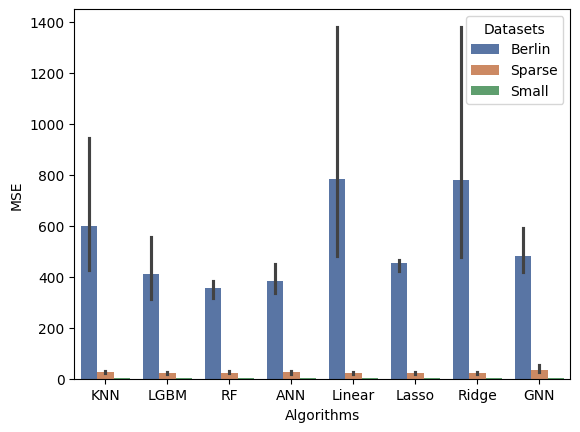

In [99]:
import seaborn as sns
bar_plot=sns.barplot(df_mean, x="Algorithms", y="MSE", hue="Datasets", palette="deep")
bar_fig = bar_plot.get_figure()
bar_fig.savefig("Barplot MSE.png")


C:\Users\user\AppData\Local\Temp\ipykernel_8156\3043188756.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


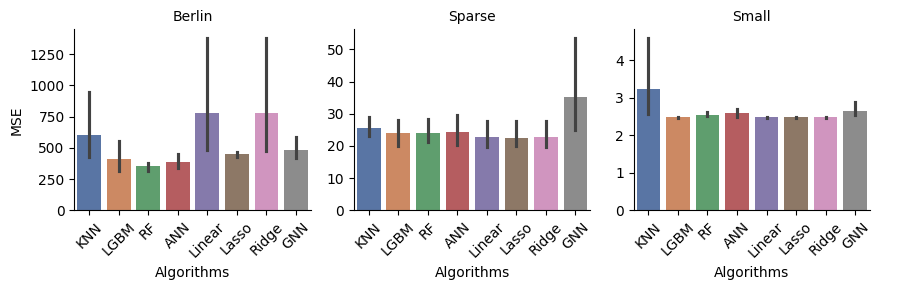

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a FacetGrid with separate subplots for each dataset and metric
g = sns.FacetGrid(df_mean, col="Datasets", sharex=False, sharey=False)
# , row='Approaches'

# Map the barplot to each subplot, differentiating algorithms by colors
g.map_dataframe(sns.barplot, x="Algorithms", y="MSE", hue="Algorithms", palette="deep")
# g.map_dataframe(sns.barplot, x="Algorithms", y="MSE", hue="Algorithms", palette="viridis")

# Rotate x-axis labels by 45 degrees
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Customize the plot (optional)
g.set_axis_labels("Algorithms", "MSE")
g.set_titles("{col_name}")
 # - {row_name}
g.fig.subplots_adjust(top=0.9)  # Adjust the top spacing
# g.fig.suptitle("Mean Absolute Error (MAE) and Mean Squared Error (MSE) by Algorithm and Dataset", fontsize=16)
g.add_legend()

# Adjust the layout to prevent overlapping labels
g.tight_layout()

# Save the plot
g.savefig("Barplot_mean MSE_diffscale.png")


In [20]:
# Data
df = pd.DataFrame.from_dict({(i, j, k): all_small[i][j][k] 
                             for i in all_small.keys()
                             for j in all_small[i].keys()
                             for k in all_small[i][j].keys()},
                            orient='index')

df = df.reset_index().rename(columns={"level_0": "Approaches", "level_1": "Algorithms", "level_2": "Instances"})

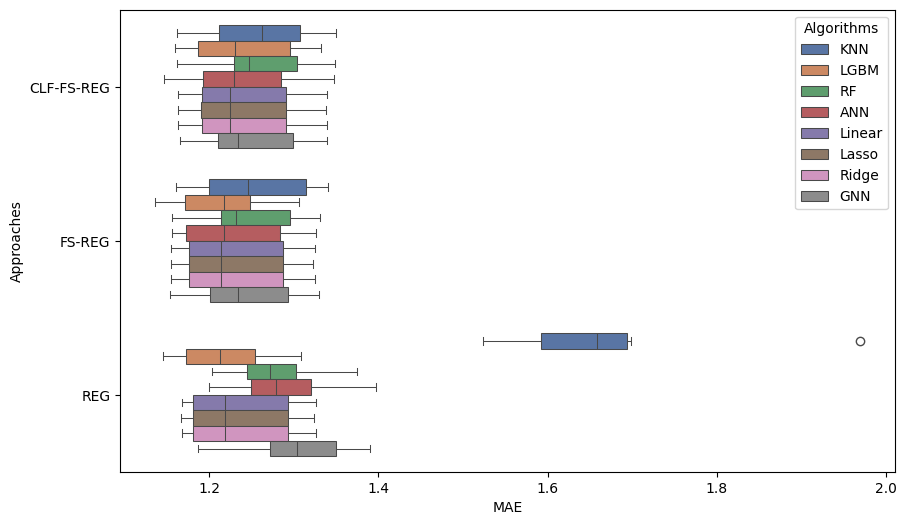

In [23]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(data=df, x="MAE", y="Approaches", hue="Algorithms", color=None, palette='deep', linewidth=.75)
box_fig = box_plot.get_figure()
box_fig.savefig("Boxplot small MAE_Instances.png")

In [31]:
df_mean = df[df['Instances']=='all']
df_mean_mae = df_mean.pivot(index='Algorithms', columns='Approaches', values='MAE')
df_mean_mse = df_mean.pivot(index='Algorithms', columns='Approaches', values='MSE')


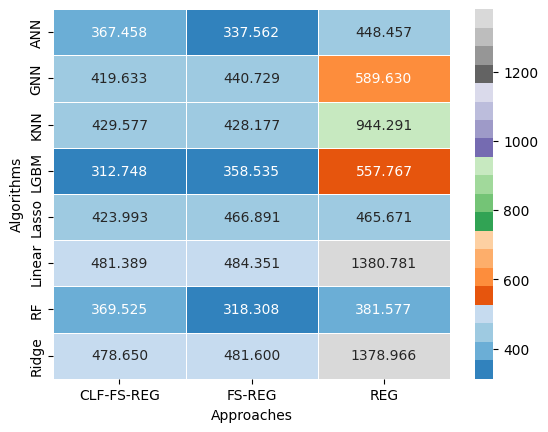

In [33]:
heatmap = sns.heatmap(df_mean_mse, annot=True, fmt='.3f', cmap="tab20c", linewidths=0.5)
heatmap_fig = heatmap.get_figure()
heatmap_fig.savefig("Heatmap berlin MSE.png")

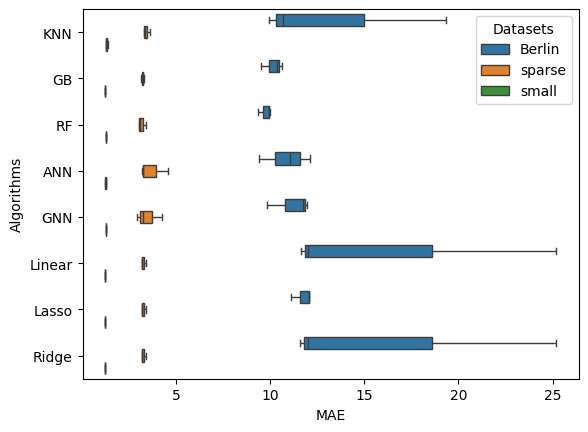

In [113]:
import seaborn as sns
import pandas as pd
# Data
df = pd.DataFrame.from_dict({(i, j, k): result_data[i][j][k] 
                             for i in result_data.keys()
                             for j in result_data[i].keys()
                             for k in result_data[i][j].keys()},
                            orient='index')

df = df.reset_index().rename(columns={"level_0": "Datasets", "level_1": "Approaches", "level_2": "Algorithms"})
df_small = df.loc[df['Datasets']=='small']
box_plot = sns.boxplot(data=df, x="MAE", y="Algorithms", hue="Datasets")
box_fig = box_plot.get_figure()
box_fig.savefig("Boxplot small MAE.png")

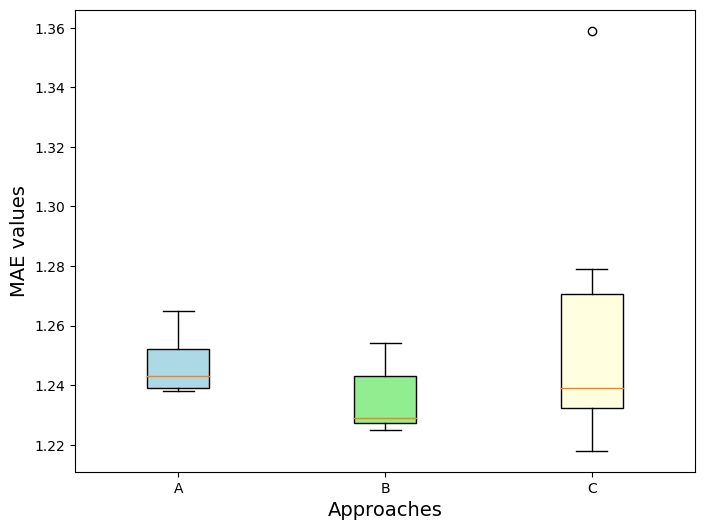

In [8]:
import matplotlib.pyplot as plt

# Data
data1 = []
for model in models:
    data1.append(result_data['small']['CL'][model]['MAE'])
data2 = []
for model in models:
    data2.append(result_data['small']['FS'][model]['MAE'])
data3 = []
for model in models:
    data3.append(result_data['small']['NFS'][model]['MAE'])
# Create a figure
fig, ax = plt.subplots(figsize=(8, 6))

# Boxplots
boxplots = ax.boxplot([data1, data2, data3], patch_artist=True)

# Customize boxplots
colors = ['lightblue', 'lightgreen', 'lightyellow']
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

# Labels and title
ax.set_xticklabels(['A', 'B', 'C'])
ax.set_ylabel('MAE values', fontsize=14)
ax.set_xlabel("Approaches", fontsize=14)
# ax.set_title('Boxplots of Scenarios')
plt.savefig("Boxplot small MAE.png")
plt.show()


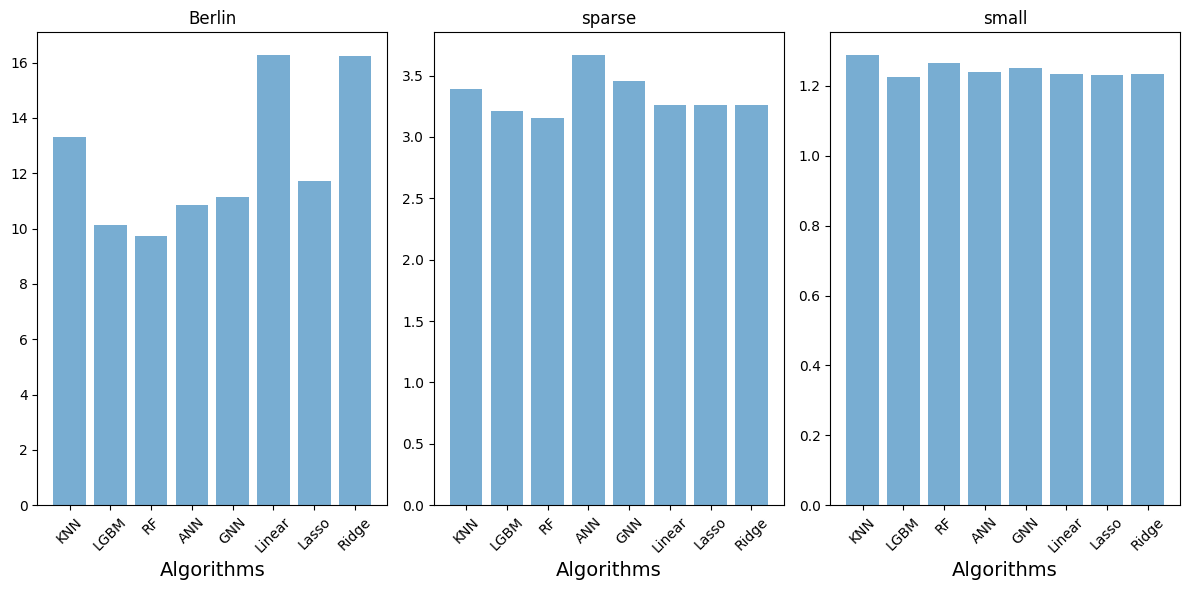

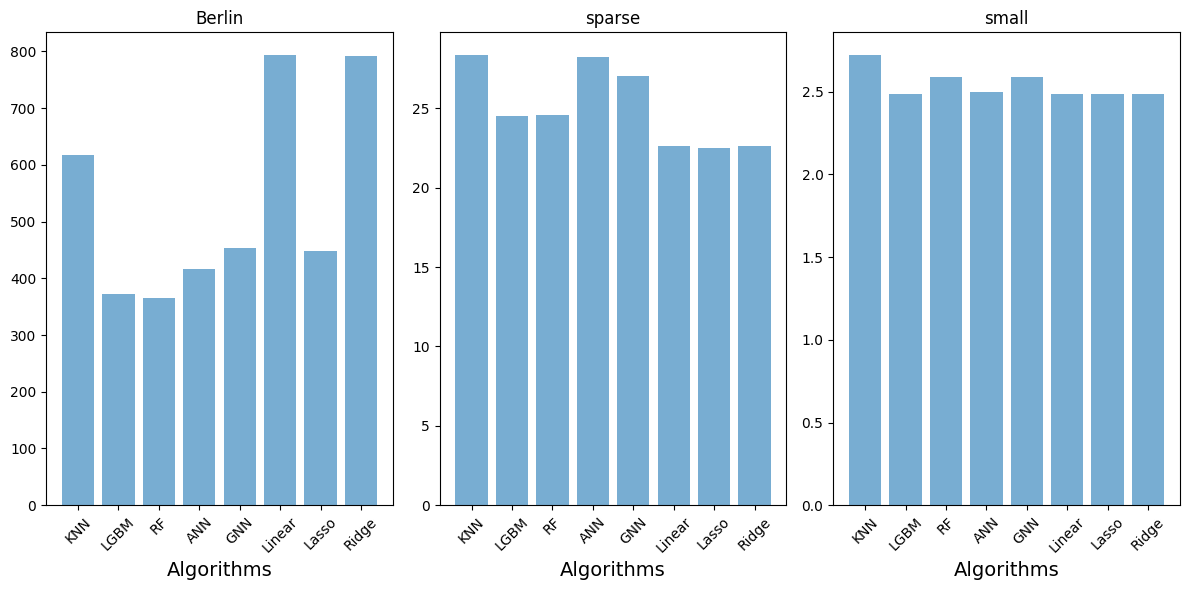

In [114]:
import matplotlib.pyplot as plt
import numpy as np

algorithms = ['KNN', 'LGBM', 'RF', 'ANN', 'GNN', 'Linear', 'Lasso', 'Ridge']
approaches = ['CL', 'FS', 'NFS']
datasets = ['Berlin', 'sparse', 'small']

# Initialize an empty numpy array to store MAE data
num_algorithms = len(algorithms)
num_approaches = len(approaches)
num_datasets = len(datasets)

mae_data = np.random.rand(num_algorithms, num_approaches, num_datasets)
mse_data = np.random.rand(num_algorithms, num_approaches, num_datasets)
# Assign the random MAE values to the mae_data array based on your specific keys
for i, algo in enumerate(algorithms):
    for j, approach in enumerate(approaches):
        for k, dataset in enumerate(datasets):
            # Check if the key exists in the provided data dictionary
            if dataset in result_data and approach in result_data[dataset] and algo in result_data[dataset][approach]:
                mae = result_data[dataset][approach][algo]['MAE']
                mae_data[i, j, k] = mae
for i, algo in enumerate(algorithms):
    for j, approach in enumerate(approaches):
        for k, dataset in enumerate(datasets):
            # Check if the key exists in the provided data dictionary
            if dataset in result_data and approach in result_data[dataset] and algo in result_data[dataset][approach]:
                mse = result_data[dataset][approach][algo]['MSE']
                mse_data[i, j, k] = mse
# Plotting MAE
plt.figure(figsize=(12, 6))

for i, dataset in enumerate(datasets):
    plt.subplot(1, 3, i+1)
    plt.bar(algorithms, mae_data[:, :, i].mean(axis=1), alpha=0.6)
    plt.title(f'{dataset}')
    plt.xticks(rotation=45)
    plt.xlabel("Algorithms", fontsize=14)
    # plt.ylim(0, np.max(mae_data))
plt.tight_layout()
plt.savefig("Barplot MAE_diffscale.png")
plt.show()

# Plotting MSE
plt.figure(figsize=(12, 6))
for i, dataset in enumerate(datasets):
    plt.subplot(1, 3, i+1)
    plt.bar(algorithms, mse_data[:, :, i].mean(axis=1), alpha=0.6)
    plt.title(f'{dataset}')
    plt.xticks(rotation=45)
    plt.xlabel("Algorithms", fontsize=14)
    # plt.ylim(0, 900)
plt.tight_layout()
plt.savefig("Barplot MSE_diffscale.png")
plt.show()


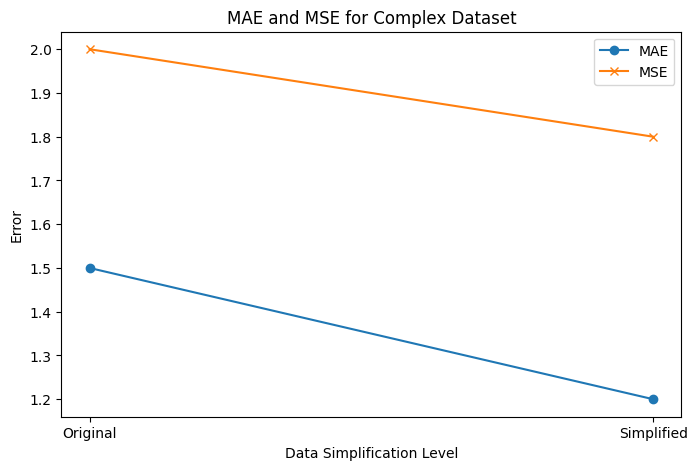

In [28]:
simplification_levels = ['Original', 'Simplified']

# Example data (replace with your actual values)
mae_complex = [1.5, 1.2]  # MAE for original and simplified
mse_complex = [2.0, 1.8]  # MSE for original and simplified

plt.figure(figsize=(8, 5))
plt.plot(simplification_levels, mae_complex, marker='o', label='MAE')
plt.plot(simplification_levels, mse_complex, marker='x', label='MSE')
plt.title('MAE and MSE for Complex Dataset')
plt.xlabel('Data Simplification Level')
plt.ylabel('Error')
plt.legend()
plt.show()


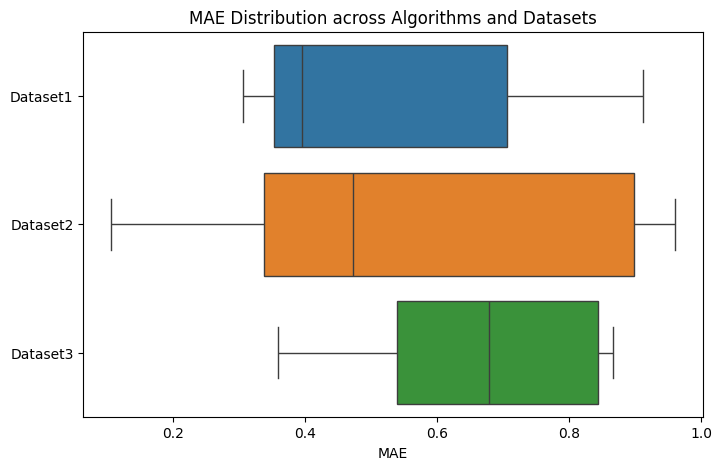

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

algorithms = ['Alg1', 'Alg2', 'Alg3', 'Alg4', 'Alg5', 'Alg6', 'Alg7']
datasets = ['Dataset1', 'Dataset2', 'Dataset3']

# Example data (replace with your actual values)
mae_data = np.random.rand(len(algorithms), len(datasets))

# Create a DataFrame for MAE data
mae_df = pd.DataFrame(mae_data, columns=datasets, index=algorithms)

plt.figure(figsize=(8, 5))
sns.boxplot(data=mae_df, orient='h')
plt.title('MAE Distribution across Algorithms and Datasets')
plt.xlabel('MAE')
plt.show()


In [21]:
simplified_result={
    'XY':{
        'CL':{
            'KNN': {'MAE': 10.837, 'MSE': 433.022, 'ME': 206.771},
            'XGB': {'MAE': 11.060, 'MSE': 382.097, 'ME': 169.109},
            'LGBM': {'MAE': 10.873, 'MSE': 378.980, 'ME': 181.716},
            'RF': {'MAE': 11.107, 'MSE': 373.860, 'ME': 184.416},
            'GB': {'MAE': 10.630, 'MSE': 334.639, 'ME': 171.392},
            'ANN': {'MAE': 9.810, 'MSE': 329.839, 'ME': 179.652},
            'GPR': {'MAE': 20.972, 'MSE': 952.208, 'ME': 263.768}
        },
        'FS':{
            'KNN': {'MAE': 10.840, 'MSE': 433.624, 'ME': 218.741},
            'XGB': {'MAE': 11.035, 'MSE': 379.228, 'ME': 175.574},
            'LGBM': {'MAE': 10.986, 'MSE': 406.445, 'ME': 178.999},
            'RF': {'MAE': 11.501, 'MSE': 380.702, 'ME': 200.179},
            'GB': {'MAE': 10.686, 'MSE': 334.995, 'ME': 167.055},
            'ANN': {'MAE': 10.576, 'MSE': 344.579, 'ME': 178.329},
            'GPR': {'MAE': 20.718, 'MSE': 1105.086, 'ME': 272.915}
        },
        'NFS':{
            'KNN': {'MAE': 20.874, 'MSE': 902.395, 'ME': 247.630},
            'XGB': {'MAE': 10.878, 'MSE': 367.182, 'ME': 165.479},
            'LGBM': {'MAE': 10.814, 'MSE': 359.121, 'ME': 172.819},
            'RF': {'MAE': 13.914, 'MSE': 430.116, 'ME': 190.980},
            'GB': {'MAE': 10.496, 'MSE': 351.225, 'ME': 169.911},
            'ANN': {'MAE': 25.420, 'MSE': 1241.056, 'ME': 193.037},
            'GPR': {'MAE': 20.915, 'MSE': 929.301, 'ME': 261.345}
        }
    },
    'LINK':{
        'CL':{
            'KNN': {'MAE': 10.155, 'MSE': 388.336, 'ME': 188.869},
            'XGB': {'MAE': 11.032, 'MSE': 322.280, 'ME': 192.515},
            'LGBM': {'MAE': 9.975, 'MSE': 306.863, 'ME': 151.208},
            'RF': {'MAE': 9.899, 'MSE': 320.828, 'ME': 182.226},
            'GB': {'MAE': 11.701, 'MSE': 378.570, 'ME': 169.763},
            'ANN': {'MAE': 11.006, 'MSE': 502.771, 'ME': 342.314},
            'GPR': {'MAE': 23.141, 'MSE': 1417.842, 'ME': 279.483}
        },
        'FS':{
            'KNN': {'MAE': 10.778, 'MSE': 440.341, 'ME': 278.171},
            'XGB': {'MAE': 10.329, 'MSE': 306.235, 'ME': 195.208},
            'LGBM': {'MAE': 11.966, 'MSE': 367.885, 'ME': 149.362},
            'RF': {'MAE': 10.032, 'MSE': 310.446, 'ME': 166.991},
            'GB': {'MAE': 10.775, 'MSE': 355.051, 'ME': 176.597},
            'ANN': {'MAE': 12.135, 'MSE': 502.339, 'ME': 364.948},
            'GPR': {'MAE': 20.875, 'MSE': 1010.731, 'ME': 268.548}
        },
        'NFS':{
            'KNN': {'MAE': 29.526, 'MSE': 1755.008, 'ME': 260.895},
            'XGB': {'MAE': 10.655, 'MSE': 309.046, 'ME': 157.204},
            'LGBM': {'MAE': 11.662, 'MSE': 364.174, 'ME': 269.113},
            'RF': {'MAE': 13.901, 'MSE': 396.991, 'ME': 154.839},
            'GB': {'MAE': 12.937, 'MSE': 461.661, 'ME': 248.728},
            'ANN': {'MAE': 17.045, 'MSE': 575.613, 'ME': 155.793},
            'GPR': {'MAE': 21.915, 'MSE': 962.133, 'ME': 262.682}
        }
    }
}

In [24]:
df_berlin = pd.DataFrame.from_dict({(i, j, k): all_berlin[i][j][k] 
                             for i in all_berlin.keys()
                             for j in all_berlin[i].keys()
                             for k in all_berlin[i][j].keys()},
                            orient='index')

df_berlin = df_berlin.reset_index().rename(columns={"level_0": "Approaches", "level_1": "Algorithms", "level_2": "Instances"})
df_berlin_mean = df_berlin[df_berlin['Instances']=='all'].drop(columns=['Instances'])

In [26]:
df_berlin_mean_CLFFSREG = df_berlin_mean[df_berlin_mean['Approaches']=='CLF-FS-REG']

In [66]:
all_berlin

{'CLF-FS-REG': {'KNN': {'all': {'MAE': 9.855874935663472,
    'MSE': 429.577388457198,
    'ME': 202.83665168555837},
   'instance_1': {'MAE': 11.979738997784445,
    'MSE': 707.4991723657674,
    'ME': 202.83665168555837},
   'instance_2': {'MAE': 4.626786883422824,
    'MSE': 114.63708508884628,
    'ME': 141.2533306150098},
   'instance_3': {'MAE': 9.163901647844758,
    'MSE': 439.8955927247035,
    'ME': 168.56596944484056},
   'instance_4': {'MAE': 14.03581393369827,
    'MSE': 623.6079313557724,
    'ME': 149.3809054964632},
   'instance_5': {'MAE': 10.370769224601831,
    'MSE': 315.26464185153395,
    'ME': 125.74237951178077}},
  'LGBM': {'all': {'MAE': 9.177232200863907,
    'MSE': 312.7483248781771,
    'ME': 181.7736080194383},
   'instance_1': {'MAE': 11.435764219217194,
    'MSE': 513.289530281381,
    'ME': 181.7736080194383},
   'instance_2': {'MAE': 4.6816401969686225,
    'MSE': 85.97608745280967,
    'ME': 87.76568973884807},
   'instance_3': {'MAE': 7.9858294984565

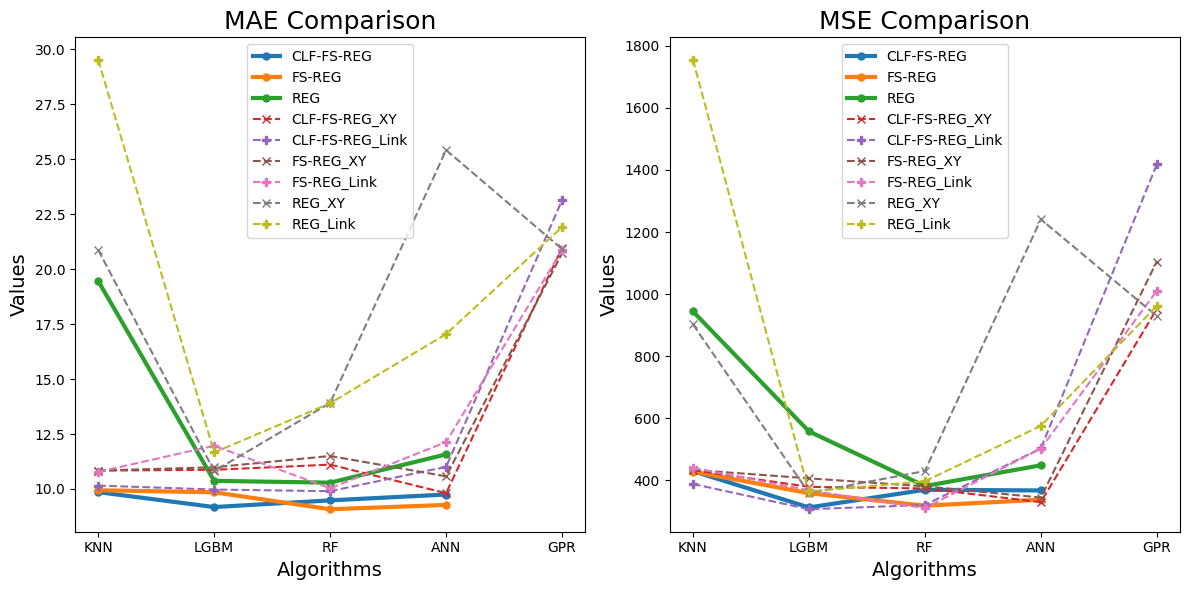

In [72]:
import matplotlib.pyplot as plt

# List of algorithms
algorithms_berlin = ['KNN', 'LGBM', 'RF', 'ANN']
algorithms = ['KNN', 'LGBM', 'RF', 'ANN', 'GPR']

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting MAE comparison

ax1.plot(algorithms, [all_berlin['CLF-FS-REG'].get(model, {}).get('all',{}).get('MAE', None) for model in algorithms], label='CLF-FS-REG', marker='o', 
         markersize=5, linewidth=3)
ax1.plot(algorithms, [all_berlin['FS-REG'].get(model, {}).get('all',{}).get('MAE', None) for model in algorithms], label='FS-REG', marker='o', 
         markersize=5, linewidth=3)
ax1.plot(algorithms, [all_berlin['REG'].get(model, {}).get('all',{}).get('MAE', None) for model in algorithms], label='REG', marker='o', 
         markersize=5, linewidth=3)
ax1.plot(algorithms, [simplified_result['XY']['CL'][model]['MAE'] for model in algorithms], label='CLF-FS-REG_XY', marker='x', linestyle='dashed')
ax1.plot(algorithms, [simplified_result['LINK']['CL'][model]['MAE'] for model in algorithms], label='CLF-FS-REG_Link', marker='P', linestyle='dashed')
ax1.plot(algorithms, [simplified_result['XY']['FS'][model]['MAE'] for model in algorithms], label='FS-REG_XY', marker='x', linestyle='dashed')
ax1.plot(algorithms, [simplified_result['LINK']['FS'][model]['MAE'] for model in algorithms], label='FS-REG_Link', marker='P', linestyle='dashed')
ax1.plot(algorithms, [simplified_result['XY']['NFS'][model]['MAE'] for model in algorithms], label='REG_XY', marker='x', linestyle='dashed')
ax1.plot(algorithms, [simplified_result['LINK']['NFS'][model]['MAE'] for model in algorithms], label='REG_Link', marker='P', linestyle='dashed')
ax1.set_title('MAE Comparison', fontsize=18)
ax1.set_xlabel('Algorithms', fontsize=14)
ax1.set_ylabel('Values', fontsize=14)
ax1.legend()

# Plotting MSE comparison
ax2.plot(algorithms, [all_berlin['CLF-FS-REG'].get(model, {}).get('all',{}).get('MSE', None) for model in algorithms], label='CLF-FS-REG', marker='o', 
         markersize=5, linewidth=3)
ax2.plot(algorithms, [all_berlin['FS-REG'].get(model, {}).get('all',{}).get('MSE', None) for model in algorithms], label='FS-REG', marker='o', 
         markersize=5, linewidth=3)
ax2.plot(algorithms, [all_berlin['REG'].get(model, {}).get('all',{}).get('MSE', None) for model in algorithms], label='REG', marker='o', 
         markersize=5, linewidth=3)
ax2.plot(algorithms, [simplified_result['XY']['CL'][model]['MSE'] for model in algorithms], label='CLF-FS-REG_XY', marker='x', linestyle='dashed')
ax2.plot(algorithms, [simplified_result['LINK']['CL'][model]['MSE'] for model in algorithms], label='CLF-FS-REG_Link', marker='P', linestyle='dashed')
ax2.plot(algorithms, [simplified_result['XY']['FS'][model]['MSE'] for model in algorithms], label='FS-REG_XY', marker='x', linestyle='dashed')
ax2.plot(algorithms, [simplified_result['LINK']['FS'][model]['MSE'] for model in algorithms], label='FS-REG_Link', marker='P', linestyle='dashed')
ax2.plot(algorithms, [simplified_result['XY']['NFS'][model]['MSE'] for model in algorithms], label='REG_XY', marker='x', linestyle='dashed')
ax2.plot(algorithms, [simplified_result['LINK']['NFS'][model]['MSE'] for model in algorithms], label='REG_Link', marker='P', linestyle='dashed')
ax2.set_title('MSE Comparison', fontsize=18)
ax2.set_xlabel('Algorithms', fontsize=14)
ax2.set_ylabel('Values', fontsize=14)
ax2.legend()

# Show plot
plt.tight_layout()
plt.savefig("lineplot comparison.png")
plt.show()


In [73]:
def load_json(file_list):
    data_frames = []
    for file in file_list:
        with open(file, 'r') as f:
            data = json.load(f)
            df_links = pd.DataFrame({
                'link_id': data['links_id'],
                'link_from': data['link_from'],
                'link_to': data['link_to'],
            })
            df_nodes = pd.DataFrame({
                'node_id': data['nodes_id'],
                'node_x': data['nodes_x'],
                'node_y': data['nodes_y']
            })
            df_links = df_links.merge(df_nodes, how='left', left_on='link_from', right_on='node_id')
            df_links = df_links.rename(columns={'node_x': 'start_node_x', 'node_y': 'start_node_y'})
            df_links.drop('node_id', axis=1, inplace=True)
            df_links = df_links.merge(df_nodes, how='left', left_on='link_to', right_on='node_id')
            df_links = df_links.rename(columns={'node_x': 'end_node_x', 'node_y': 'end_node_y'})
            df_links.drop('node_id', axis=1, inplace=True)
        data_frames.append(df_links)
    return pd.concat(data_frames, ignore_index=True)

In [74]:
import folium
from pyproj import Transformer
from loading import load_data
import pandas as pd
import json
# Define the EPSG code for your coordinate system
epsg_code = 'EPSG:31468'  # Replace 'your_epsg_code' with the actual EPSG code

# Create a Transformer object to convert coordinates from EPSG to WGS84
transformer = Transformer.from_crs(epsg_code, 'EPSG:4326')

In [67]:
train_files = ['s-0.json', 's-1.json', 's-2.json', 's-3.json', 's-4.json','s-5.json', 's-6.json', 's-7.json', 's-8.json', 's-9.json'] 
test_files = ['s-15.json', 's-16.json', 's-17.json', 's-18.json','s-19.json']
validate_files = ['s-10.json', 's-11.json', 's-12.json', 's-13.json','s-14.json']
train_files = ['Data/cutoutWorlds/Train/po-1_pn-1.0_sn-1/' + i for i in train_files]
test_files = ['Data/cutoutWorlds/Test/po-1_pn-1.0_sn-1/' + j for j in test_files]
validate_files = ['Data/cutoutWorlds/Validate/po-1_pn-1.0_sn-1/' + k for k in validate_files]
train_data = load_json(train_files)
validate_data = load_json(validate_files)
test_data = load_json(test_files)
train_data['dataset'] = 'train'
validate_data['dataset'] = 'validate'
test_data['dataset'] = 'test'
Big_data = pd.concat([train_data, validate_data, test_data], ignore_index=True)

In [44]:
# Convert coordinates from EPSG to WGS84
Big_data['start_lat'], Big_data['start_lon'] = transformer.transform(Big_data['start_node_y'].tolist(), Big_data['start_node_x'].tolist())
Big_data['end_lat'], Big_data['end_lon'] = transformer.transform(Big_data['end_node_y'].tolist(), Big_data['end_node_x'].tolist())

# Create a map centered on the mean latitude and longitude of your data
map_center = [Big_data[['start_lat', 'end_lat']].mean().mean(), Big_data[['start_lon', 'end_lon']].mean().mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Define colors for each dataset
colors = {'train': 'blue', 'validate': 'green', 'test': 'red'}

# Iterate over each row in the dataframe
for _, row in Big_data.iterrows():
    # Extract start and end coordinates
    start_coords = [row['start_lat'], row['start_lon']]
    end_coords = [row['end_lat'], row['end_lon']]
    
    # Get the color based on the dataset
    color = colors[row['dataset']]
    
    # # Add a marker for the start node
    # folium.Marker(start_coords, icon=folium.Icon(color=color)).add_to(m)
    
    # # Add a marker for the end node
    # folium.Marker(end_coords, icon=folium.Icon(color=color)).add_to(m)
    
    # Add a line connecting the start and end nodes
    folium.PolyLine([start_coords, end_coords], color=color, weight=10, opacity=0.6).add_to(m)

# Save the map to an HTML file
output_file = 'map.html'
m.save(output_file)
print(f"Map saved to {output_file}")

Map saved to map.html


In [68]:
sparse_train_files = [f'Data/sparseWorlds/Train/po-1/s-{i}.json'for i in range(10)]
sparse_train_data = load_json(sparse_train_files)
sparse_validate_files = [f'Data/sparseWorlds/Validate/po-1/s-{i}.json'for i in range(10, 15)]
sparse_validate_data = load_json(sparse_validate_files)
sparse_test_files = [f'Data/sparseWorlds/Test/po-1/s-{i}.json'for i in range(15, 20)]
sparse_test_data = load_json(sparse_test_files)
sparse_train_data['dataset'] = 'train'
sparse_validate_data['dataset'] = 'validate'
sparse_test_data['dataset'] = 'test'
sparse_Big_data = pd.concat([sparse_train_data, sparse_validate_data, sparse_test_data], ignore_index=True)

In [77]:
sparse_Big_data['start_lat'], sparse_Big_data['start_lon'] = transformer.transform(sparse_Big_data['start_node_y'].tolist(), sparse_Big_data['start_node_x'].tolist())
sparse_Big_data['end_lat'], sparse_Big_data['end_lon'] = transformer.transform(sparse_Big_data['end_node_y'].tolist(), sparse_Big_data['end_node_x'].tolist())

# Create a map centered on the mean latitude and longitude of your data
map_center = [sparse_Big_data[['start_lat', 'end_lat']].mean().mean(), sparse_Big_data[['start_lon', 'end_lon']].mean().mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Define colors for each dataset
colors = {'train': 'blue', 'validate': 'green', 'test': 'red'}

# Iterate over each row in the dataframe
for _, row in sparse_Big_data[sparse_Big_data['dataset']=='test'].iterrows():
    # Extract start and end coordinates
    start_coords = [row['start_lat'], row['start_lon']]
    end_coords = [row['end_lat'], row['end_lon']]
    
    # Get the color based on the dataset
    color = colors[row['dataset']]
    
    # # Add a marker for the start node
    # folium.Marker(start_coords, icon=folium.Icon(color=color)).add_to(m)
    
    # # Add a marker for the end node
    # folium.Marker(end_coords, icon=folium.Icon(color=color)).add_to(m)
    
    # Add a line connecting the start and end nodes
    folium.PolyLine([start_coords, end_coords], color=color).add_to(m)

# Save the map to an HTML file
output_file = 'sparse_map_test.html'
m.save(output_file)
print(f"Map saved to {output_file}")

Map saved to sparse_map_test.html


In [78]:
small_train_files = [f'Data/smallWorlds/Train/s/s-{i}.json'for i in range(10)]
small_validate_files = [f'Data/smallWorlds/Validate/s/s-{i}.json'for i in range(10, 15)]
small_test_files = [f'Data/smallWorlds/Test/s/s-{i}.json'for i in range(15, 20)]
small_train_data = load_json(small_train_files)
small_validate_data = load_json(small_validate_files)
small_test_data = load_json(small_test_files)
small_train_data['dataset'] = 'train'
small_validate_data['dataset'] = 'validate'
small_test_data['dataset'] = 'test'
small_Big_data = pd.concat([small_train_data, small_validate_data, small_test_data], ignore_index=True)

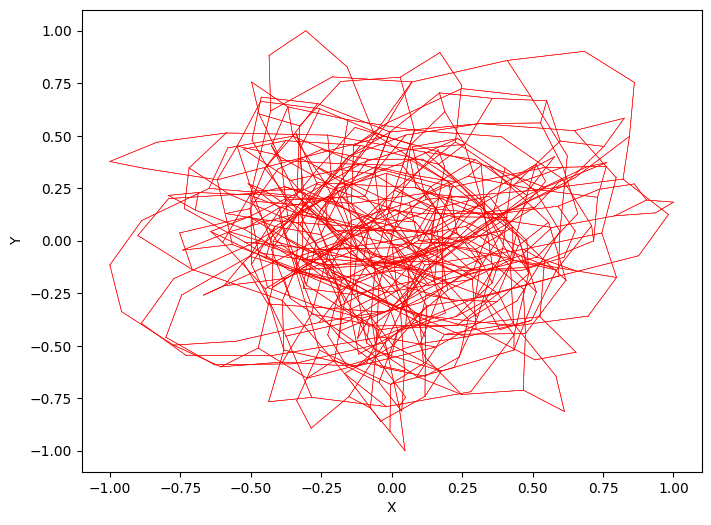

In [84]:
import matplotlib.pyplot as plt

# Assuming you have the start and end coordinates in separate lists or arrays
start_x = small_test_data['start_node_x']
start_y = small_test_data['start_node_y']
end_x = small_test_data['end_node_x']
end_y = small_test_data['end_node_y']

# Define colors for each dataset
colors = {'train': 'blue', 'validate': 'green', 'test': 'red'}

# Create a line plot
plt.figure(figsize=(8, 6))
for i in range(len(start_x)):
    x = [start_x[i], end_x[i]]
    y = [start_y[i], end_y[i]]
    dataset = small_test_data.loc[i, 'dataset']
    color = colors[dataset]
    plt.plot(x, y, color=color, linestyle='-', linewidth=0.4)

plt.xlabel('X')
plt.ylabel('Y')
plt.savefig("Small data test.png")